In [7]:
import qiskit as q
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.circuit.library import XOR
from matplotlib import style
import math
style.use("dark_background")
%matplotlib inline

def plot(statevec,counts):
    plot_histogram(counts,legend=["output"])
    plot_bloch_multivector(statevec)


In [8]:
qasmSim = q.Aer.get_backend("qasm_simulator")
stateVecSim = q.Aer.get_backend("statevector_simulator")
def do_job(circ):
    stateVec = q.execute(circ,backend=stateVecSim).result().get_statevector()

    n_qubits = circ.num_qubits
    circ.measure([i for i in range(n_qubits)],[i for i in range(len(circ.clbits))])
    qasmJob = q.execute(circ, backend=qasmSim,shots=1024).result()
    counts = qasmJob.get_counts()
    return stateVec,counts
def plot(statevec,counts):
    plot_histogram(counts,legend=["output"])
    plot_bloch_multivector(statevec)

┌───┐ ░                 ░       
q_0: ┤ H ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ H ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

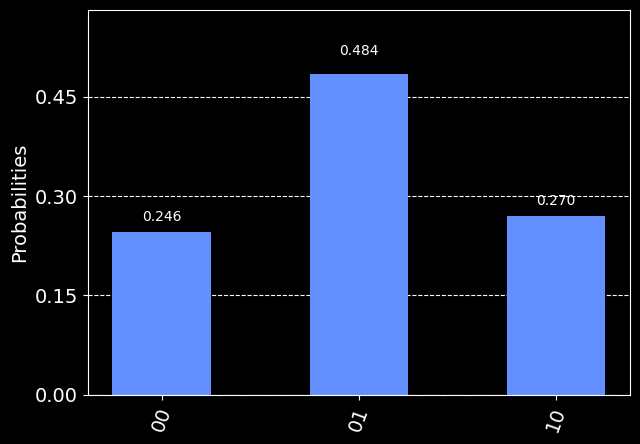

In [9]:
c = q.QuantumCircuit(4,2,name="halfAdder")
c.h(0)
c.h(1)
c.barrier()
c.cx(0,2)
c.cx(1,2)
c.ccx(0,1,3)
c.barrier()


c.measure([2,3],[i for i in range(len(c.clbits))])
qasmJob = q.execute(c, backend=qasmSim,shots=1024).result()
counts = qasmJob.get_counts()
plot_histogram(counts)
c.draw()

# Half Adder

In [10]:
c = q.QuantumCircuit(4,name="halfAdder")
c.cx(0,2)
c.cx(1,2)
c.ccx(0,1,3)
instr = c.to_instruction()
c.draw(output="text")

q_0: ──■─────────■──
       │         │  
q_1: ──┼────■────■──
     ┌─┴─┐┌─┴─┐  │  
q_2: ┤ X ├┤ X ├──┼──
     └───┘└───┘┌─┴─┐
q_3: ──────────┤ X ├
               └───┘

# Full Adder

In [11]:

ci = q.QuantumCircuit(8,2)
ci.h(0)
ci.h(1)
ci.h(4)
ci.barrier()
ci.append(instr,[0,1,2,3])
ci.barrier()
ci.append(instr,[2,4,5,6])
ci.barrier()
ci.x(3)
ci.x(6)
ci.ccx(3,6,7)
ci.x(7)
ci.barrier()
ci.measure([5,7],[0,1])

# ci.draw(output="mpl")
# qasmJob = q.execute(ci, backend=qasmSim,shots=1024).result()
# counts = qasmJob.get_counts()


In [22]:
from qiskit import IBMQ,Aer
from qiskit.tools.monitor import job_monitor


# provider = Aer
backend = Aer.get_backend('aer_simulator')
job = q.execute(ci,backend=backend,shots=500)
job_monitor(job)

Job Status: job is being initialized

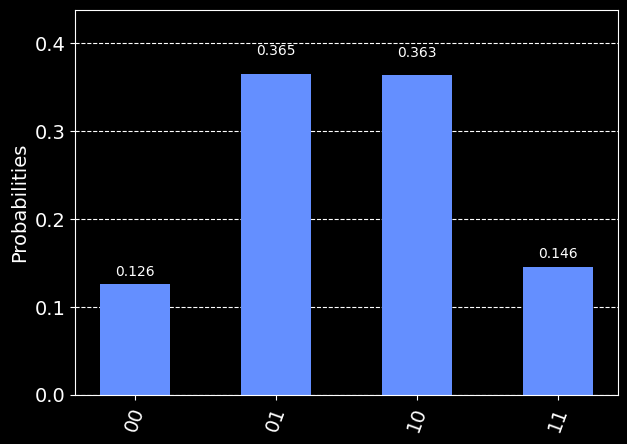

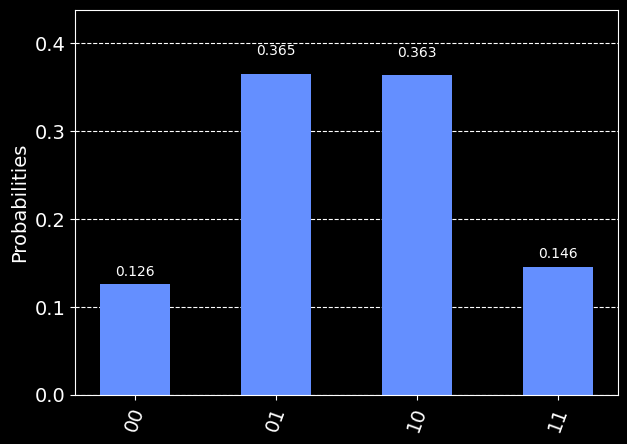

In [ ]:
res = job.result().get_counts()
plot_histogram(counts)


# Efficient half adder

In [ ]:
cQ = q.QuantumRegister(2)
# cC = q.ClassicalRegister(2)
cA = q.AncillaRegister(1)
cp = q.QuantumCircuit(cQ,cA,name="half-AdderEf")
cp.h(0)
cp.h(1)
cp.ccx(0,1,cA[0])
cp.cx(1,0)
cp.dcx(1,2)
cp.draw(output="text")
instrp = cp.to_instruction()
# qasmJob = q.execute(c, backend=qasmSim,shots=1024).result()
# counts = qasmJob.get_counts()
# plot_histogram(counts)

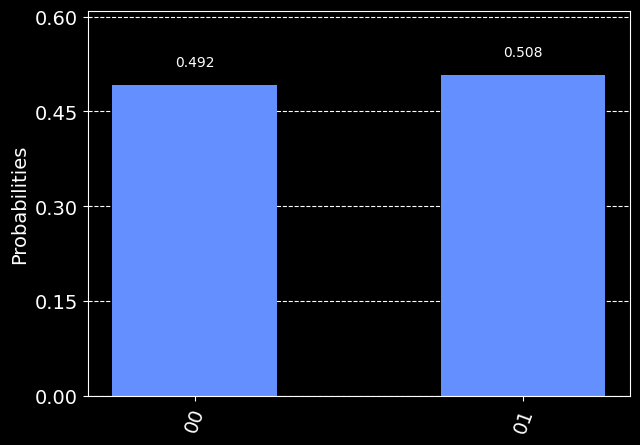

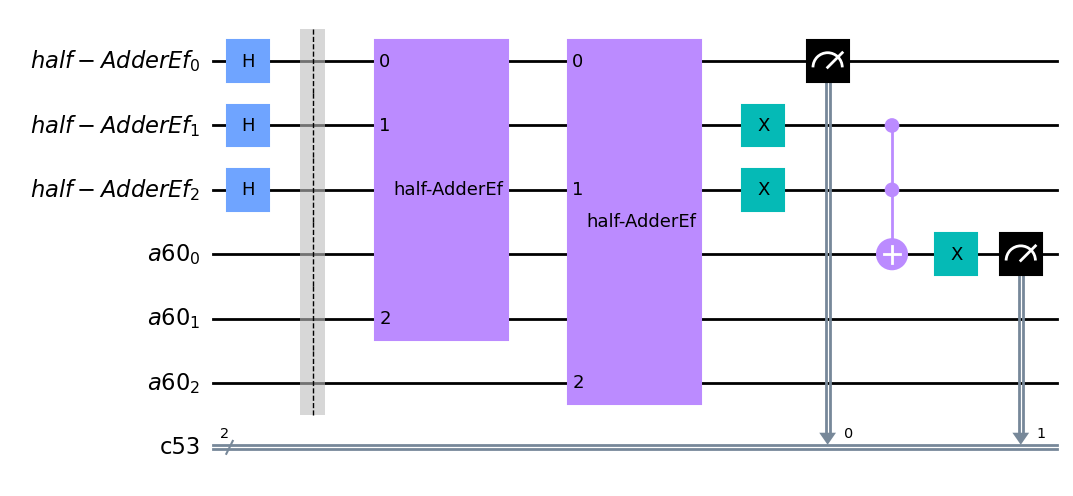

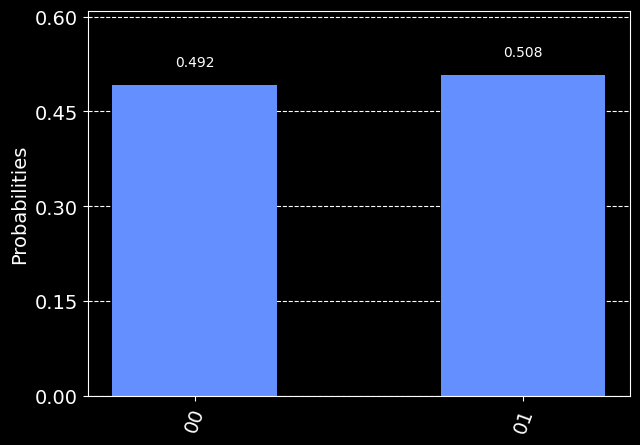

In [ ]:
cQ = q.QuantumRegister(3,name="half-AdderEf")
cC = q.ClassicalRegister(2)
cA = q.AncillaRegister(3)
ci = q.QuantumCircuit(cQ,cC,cA)
ci.h(0)
ci.h(1)
ci.h(2)
ci.barrier()
ci.append(instrp,[0,1,4])
ci.append(instrp,[0,2,5])
ci.x(1)
ci.x(2)
ci.ccx(1,2,3)
ci.x(3)
ci.measure([0,3],[0,1])
ci.draw(output="mpl")
qasmJob = q.execute(ci, backend=qasmSim,shots=1024).result()
counts = qasmJob.get_counts()
plot_histogram(counts)
